## Taken from: https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#x_train = x_train.reshape(60000, 28*28)
#x_test = x_test.reshape(10000, 28*28)

In [3]:
def noisy(button):
    noise_factor = noise.value
    x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
    x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

    x_train_noisy = np.clip(x_train_noisy, 0., 1.)
    x_test_noisy = np.clip(x_test_noisy, 0., 1.)

    n = 10
    plt.figure(figsize=(20, 2))
    plt.title("Linear graph")
    for i in range(1, n + 1):
        ax = plt.subplot(1, n, i)
        plt.imshow(x_test_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.title("\n\nNoise Factor = {:.2f}".format(noise_factor), size=20)
    plt.show()

    input_img = keras.Input(shape=(28, 28, 1))

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # At this point the representation is (7, 7, 32)

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = keras.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    autoencoder.fit(x_train_noisy, x_train,
                    epochs=iterations.value,
                    batch_size=128,
                    shuffle=True)

    autoencoder.evaluate(x_test_noisy, x_test, verbose=2)
    
    decoded_imgs = autoencoder.predict(x_test)

    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(1, n + 1):
        # Display original
        ax = plt.subplot(2, n, i)
        plt.imshow(x_test_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    #plt.title("\n\nNoise Factor = {:.1f}".format(noise_factor), size=20)
    plt.title("\n\nNoise Factor = {:.2f} Epochs  = {:d}".format(noise_factor, iterations.value), size=20)
    plt.show()

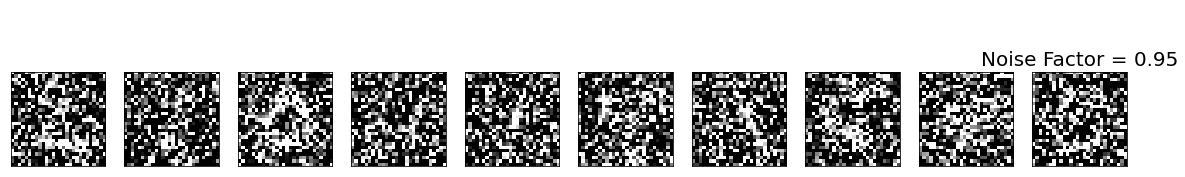

Epoch 1/100
469/469 [==============================] - 84s 179ms/step - loss: 0.2214
Epoch 2/100
469/469 [==============================] - 86s 184ms/step - loss: 0.1773
Epoch 3/100
469/469 [==============================] - 87s 185ms/step - loss: 0.1703
Epoch 4/100
469/469 [==============================] - 85s 181ms/step - loss: 0.1663
Epoch 5/100
469/469 [==============================] - 79s 168ms/step - loss: 0.1635
Epoch 6/100
469/469 [==============================] - 79s 168ms/step - loss: 0.1611
Epoch 7/100
469/469 [==============================] - 84s 179ms/step - loss: 0.1596
Epoch 8/100
469/469 [==============================] - 77s 164ms/step - loss: 0.1583
Epoch 9/100
469/469 [==============================] - 82s 174ms/step - loss: 0.1575
Epoch 10/100
469/469 [==============================] - 79s 169ms/step - loss: 0.1566
Epoch 11/100
469/469 [==============================] - 79s 168ms/step - loss: 0.1560
Epoch 12/100
469/469 [==============================] - 80s 171

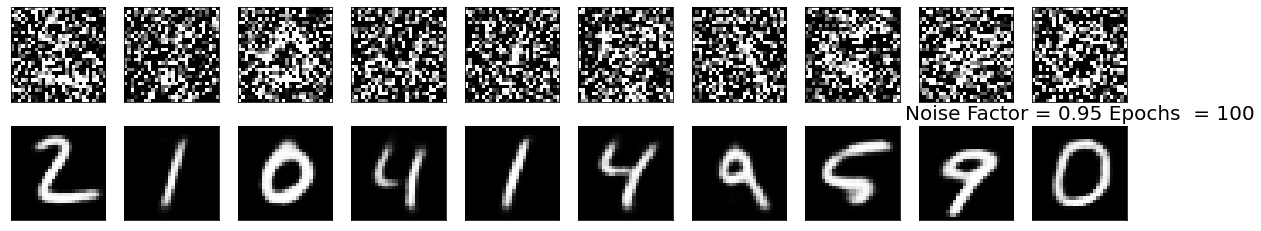

In [4]:
from ipywidgets import widgets, Layout
noise = widgets.FloatText(value=0.5, description='Noise Factor:', disabled=False)
iterations = widgets.IntText(value=5, description='Epochs:', disabled=False)
submit = widgets.Button(description='Submit')
submit.on_click(noisy)
widgets.HBox([noise, iterations, submit])